In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_parquet("data/train_v2.parquet")
test_df = pd.read_parquet("data/test_v2.parquet")

In [3]:
train_df_v6 = pd.read_parquet("data/train_v6.parquet")
kfold = train_df_v6["kfold"].values
train_df["kfold"] = kfold

In [4]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Columns: 1122 entries, id to kfold
dtypes: category(1), float32(1117), float64(1), int32(3)
memory usage: 3.1 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 1120 entries, id to TE_Rounded_VO2_Rounded_Heat_Index_max
dtypes: category(1), float32(1117), int32(2)
memory usage: 1.0 GB


(None, None)

In [5]:
train_df["Sex_Encoded"] = train_df["Sex"].map({
    "male": 1,
    "female": -1,
}).astype("int32")
test_df["Sex_Encoded"] = test_df["Sex"].map({
    "male": 1,
    "female": -1,
}).astype("int32")
train_df.drop(columns=["Sex"], inplace=True)
test_df.drop(columns=["Sex"], inplace=True)

In [6]:
train_df

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Total_Exertion,...,TE_Rounded_pct_MHR_Rounded_VO2_max,TE_Rounded_pct_MHR_Rounded_Heat_Index_max,TE_Rounded_Body_Fat_Pct_Rounded_Training_Load_max,TE_Rounded_Body_Fat_Pct_Rounded_VO2_max,TE_Rounded_Body_Fat_Pct_Rounded_Heat_Index_max,TE_Rounded_Training_Load_Rounded_VO2_max,TE_Rounded_Training_Load_Rounded_Heat_Index_max,TE_Rounded_VO2_Rounded_Heat_Index_max,kfold,Sex_Encoded
0,0,36,189.0,82.0,26.0,101.0,41.000000,150.0,22.955685,2626.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,4,1
1,1,64,163.0,60.0,8.0,85.0,39.700001,34.0,22.582708,680.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,0,-1
2,2,51,161.0,64.0,7.0,84.0,39.799999,29.0,24.690405,588.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,3,-1
3,3,20,192.0,90.0,25.0,105.0,40.700001,140.0,24.414062,2625.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,2,1
4,4,38,166.0,61.0,25.0,102.0,40.599998,146.0,22.136740,2550.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,28,193.0,97.0,30.0,114.0,40.900002,230.0,26.040968,3420.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,1,1
749996,749996,64,165.0,63.0,18.0,92.0,40.500000,96.0,23.140495,1656.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,4,-1
749997,749997,60,162.0,67.0,29.0,113.0,40.900002,221.0,25.529644,3277.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,0,1
749998,749998,45,182.0,91.0,17.0,102.0,40.299999,109.0,27.472527,1734.0,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,2,1


In [7]:
test_df

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Total_Exertion,Heart_Effort,...,TE_Rounded_pct_MHR_Rounded_Training_Load_max,TE_Rounded_pct_MHR_Rounded_VO2_max,TE_Rounded_pct_MHR_Rounded_Heat_Index_max,TE_Rounded_Body_Fat_Pct_Rounded_Training_Load_max,TE_Rounded_Body_Fat_Pct_Rounded_VO2_max,TE_Rounded_Body_Fat_Pct_Rounded_Heat_Index_max,TE_Rounded_Training_Load_Rounded_VO2_max,TE_Rounded_Training_Load_Rounded_Heat_Index_max,TE_Rounded_VO2_Rounded_Heat_Index_max,Sex_Encoded
0,750000,45,177.0,81.0,7.0,87.0,39.799999,25.854639,609.0,12.428572,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,1
1,750001,26,200.0,97.0,20.0,101.0,40.500000,24.250000,2020.0,5.050000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,1
2,750002,29,188.0,85.0,16.0,102.0,40.400002,24.049343,1632.0,6.375000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,-1
3,750003,39,172.0,73.0,20.0,107.0,40.599998,24.675501,2140.0,5.350000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,-1
4,750004,30,173.0,67.0,16.0,94.0,40.500000,22.386314,1504.0,5.875000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,56,159.0,62.0,6.0,85.0,39.400002,24.524345,510.0,14.166667,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,-1
249996,999996,32,202.0,101.0,3.0,84.0,38.400002,24.752476,252.0,28.000000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,1
249997,999997,31,164.0,64.0,14.0,98.0,40.099998,23.795361,1372.0,7.000000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,-1
249998,999998,62,158.0,61.0,25.0,106.0,40.700001,24.435186,2650.0,4.240000,...,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,-1


In [8]:
feature_variance = train_df.drop(columns=["id", "kfold", "Calories"]).var(ddof=1)
feature_variance 

Age                                                230.282108
Height                                             164.467682
Weight                                             195.515991
Duration                                            69.790909
Heart_Rate                                          89.299576
                                                      ...    
TE_Rounded_Body_Fat_Pct_Rounded_Heat_Index_max       0.000000
TE_Rounded_Training_Load_Rounded_VO2_max             0.000000
TE_Rounded_Training_Load_Rounded_Heat_Index_max      0.000000
TE_Rounded_VO2_Rounded_Heat_Index_max                0.000000
Sex_Encoded                                          0.999998
Length: 1119, dtype: float64

In [14]:
# Sort features by variance
sorted_features = feature_variance.sort_values(ascending=True)
sorted_features[:40]

TE_Rounded_BMI_Rounded_pct_MHR_Rounded_VO2_median        0.0
TE_Age_Rounded_BMI_Rounded_pct_MHR_q75                   0.0
TE_Age_Rounded_BMI_Rounded_Body_Fat_Pct_q75              0.0
TE_Age_Rounded_BMI_Rounded_Training_Load_q75             0.0
TE_Age_Rounded_BMI_Rounded_VO2_q75                       0.0
TE_Age_Rounded_BMI_Rounded_Heat_Index_q75                0.0
TE_Age_Rounded_BMR_Rounded_LBM_q75                       0.0
TE_Age_Rounded_BMR_Rounded_BSA_q75                       0.0
TE_Age_Rounded_BMR_Rounded_pct_MHR_q75                   0.0
TE_Age_Rounded_BMR_Rounded_Body_Fat_Pct_q75              0.0
TE_Age_Rounded_BMR_Rounded_Training_Load_q75             0.0
TE_Age_Rounded_BMR_Rounded_VO2_q75                       0.0
TE_Age_Rounded_BMR_Rounded_Heat_Index_q75                0.0
TE_Age_Rounded_LBM_Rounded_BSA_q75                       0.0
TE_Age_Rounded_LBM_Rounded_pct_MHR_q75                   0.0
TE_Age_Rounded_BMI_Rounded_BSA_q75                       0.0
TE_Age_Rounded_LBM_Round

/var/folders/w4/c10dthfn7jnfs1zt4_827s040000gn/T/ipykernel_80436/1446822895.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_features.index[:top_n], rotation=90, ha="right")


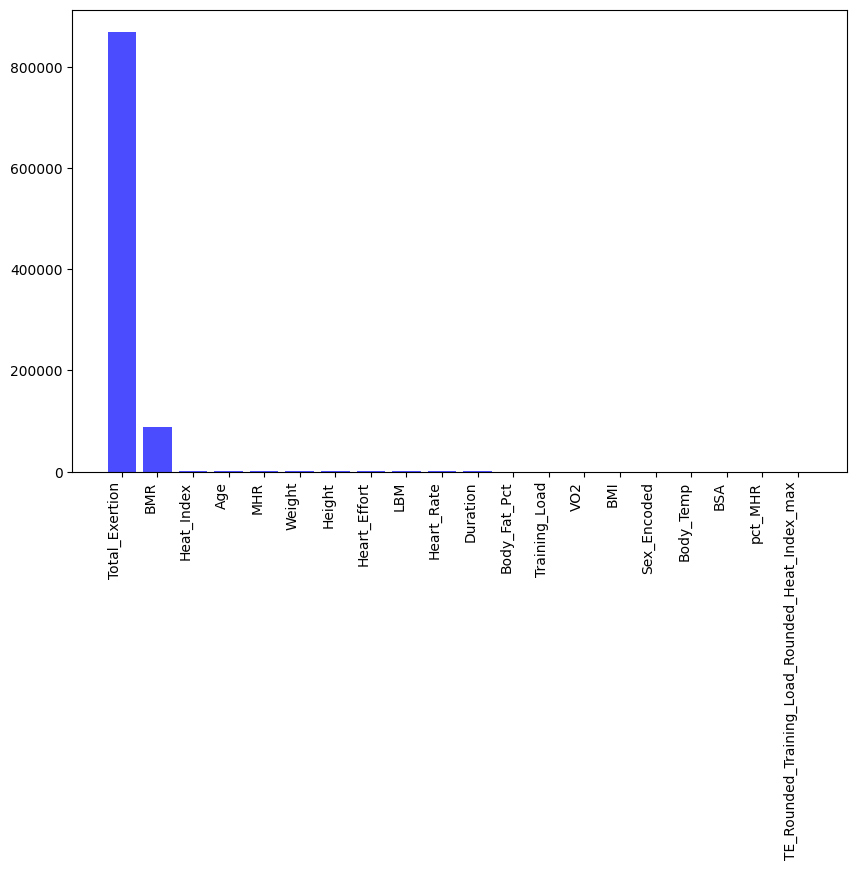

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
top_n = 20
ax.bar(sorted_features.index[:top_n], sorted_features.values[:top_n], color="blue", alpha=0.7)
ax.set_xticklabels(sorted_features.index[:top_n], rotation=90, ha="right")
plt.show()

In [17]:
low_var_feature = feature_variance[feature_variance == 0.0].index.values
len(low_var_feature)

1100

In [ ]:
train_df.drop(columns=low_var_feature, inplace=True)
test_df.drop(columns=low_var_feature, inplace=True)
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              750000 non-null  int32  
 1   Age             750000 non-null  int32  
 2   Height          750000 non-null  float32
 3   Weight          750000 non-null  float32
 4   Duration        750000 non-null  float32
 5   Heart_Rate      750000 non-null  float32
 6   Body_Temp       750000 non-null  float32
 7   Calories        750000 non-null  float64
 8   BMI             750000 non-null  float32
 9   Total_Exertion  750000 non-null  float32
 10  Heart_Effort    750000 non-null  float32
 11  BMR             750000 non-null  float32
 12  LBM             750000 non-null  float32
 13  BSA             750000 non-null  float32
 14  Body_Fat_Pct    750000 non-null  float32
 15  MHR             750000 non-null  float32
 16  pct_MHR         750000 non-null  float32
 17  Training_L

(None, None)

In [14]:
# Standardize all the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[train_df.columns.difference(["id", "kfold", "Calories"])] = scaler.fit_transform(
    train_df[train_df.columns.difference(["id", "kfold", "Calories"])]
)
test_df[test_df.columns.difference(["id", "kfold"])] = scaler.transform(
    test_df[test_df.columns.difference(["id", "kfold"])]
)

In [15]:
train_df

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Total_Exertion,...,LBM,BSA,Body_Fat_Pct,MHR,pct_MHR,Training_Load,VO2,Heat_Index,kfold,Sex_Encoded
0,0,-0.357192,1.115235,0.490201,1.266324,0.583714,1.235772,150.0,-0.939009,1.162994,...,0.808171,0.686208,-1.448014,0.357192,0.137818,1.036029,0.593078,1.476233,4,1.001925
1,1,1.487943,-0.912137,-1.083172,-0.888309,-1.109436,-0.431162,34.0,-1.185799,-0.923974,...,-1.030840,-1.050699,1.460547,-1.487943,0.082445,-0.809703,-1.148303,-0.895212,0,-0.998079
2,2,0.631273,-1.068088,-0.797104,-1.008011,-1.215258,-0.302939,29.0,0.208818,-1.022639,...,-1.025336,-0.873274,1.380739,-0.631273,-0.572931,-0.973498,-1.231826,-0.952772,3,-0.998079
3,3,-1.411555,1.349162,1.062337,1.146622,1.007002,0.851096,140.0,0.025968,1.161922,...,1.168286,1.158650,-1.782294,1.411555,-0.189841,0.822509,1.043869,1.145267,2,1.001925
4,4,-0.225397,-0.678209,-1.011655,1.146622,0.689536,0.722867,146.0,-1.480887,1.081489,...,-0.882515,-0.933027,0.332077,0.225397,0.295756,0.987478,0.695479,1.073318,3,-0.998079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,-0.884374,1.427138,1.562956,1.745131,1.959399,1.107548,230.0,1.102456,2.014512,...,1.444874,1.523122,-1.125444,0.884374,0.752178,1.695309,1.982637,1.850369,1,1.001925
749996,749996,1.487943,-0.756185,-0.868621,0.308709,-0.368683,0.594643,96.0,-0.816724,0.122727,...,-0.879763,-0.842926,1.576482,-1.487943,0.697282,0.355225,-0.407473,0.296267,4,-0.998079
749997,749997,1.224352,-0.990113,-0.582554,1.625430,1.853577,1.107548,221.0,0.764124,1.861153,...,-0.373632,-0.691834,0.043080,-1.224352,2.293662,2.192224,1.821885,1.738128,0,1.001925
749998,749998,0.235887,0.569404,1.133854,0.189007,0.689536,0.338191,109.0,2.049686,0.206378,...,0.967413,0.971369,-0.150659,-0.235887,0.602923,0.223618,0.683465,0.097687,2,1.001925


In [16]:
test_df

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,Total_Exertion,Heart_Effort,BMR,LBM,BSA,Body_Fat_Pct,MHR,pct_MHR,Training_Load,VO2,Heat_Index,Sex_Encoded
0,750000,0.235887,0.179525,0.418684,-1.008011,-0.897793,-0.302939,0.979166,-1.000118,0.153719,0.467680,0.487644,0.363639,-0.486934,-0.235887,-0.571542,-0.973366,-0.904030,-0.952772,1.001925
1,750001,-1.016169,1.972969,1.562956,0.548113,0.583714,0.594643,-0.082589,0.513096,-0.449218,1.817136,1.610774,1.689991,-1.577368,1.016169,-0.249875,0.317424,0.610240,0.497724,1.001925
2,750002,-0.818476,1.037259,0.704752,0.069306,0.689536,0.466419,-0.215359,0.096989,-0.340946,0.544671,0.578006,0.816563,0.371070,0.818476,-0.066092,-0.030368,0.710925,0.048761,-0.998079
3,750003,-0.159499,-0.210354,-0.153452,0.548113,1.218646,0.722867,0.198956,0.641788,-0.424704,-0.369068,-0.362181,-0.157740,0.899591,0.159499,0.716693,0.580118,1.222927,0.555284,-0.998079
4,750004,-0.752578,-0.132378,-0.582554,0.069306,-0.157039,0.594643,-1.315749,-0.040284,-0.381804,-0.398680,-0.454407,-0.455766,0.065251,0.752578,-0.604509,-0.147433,-0.137456,0.094809,-0.998079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,0.960762,-1.224040,-0.940138,-1.127713,-1.109436,-0.815839,0.098940,-1.106289,0.295747,-1.303958,-1.154044,-1.023992,1.545412,-0.960762,-0.281745,-1.042304,-1.134574,-1.102426,-0.998079
249996,999996,-0.620783,2.128921,1.849024,-1.486818,-1.215258,-2.098097,0.249888,-1.382979,1.426134,1.893281,1.802681,1.930993,-1.233905,0.620783,-1.261227,-1.371749,-1.199218,-1.395979,1.001925
249997,999997,-0.686681,-0.834161,-0.797104,-0.170098,0.266248,0.081738,-0.383414,-0.181846,-0.289875,-0.707490,-0.899380,-0.809397,0.397955,0.686681,-0.278651,-0.269677,0.284160,-0.267815,-0.998079
249998,999998,1.356148,-1.302016,-1.011655,1.146622,1.112824,0.851096,0.039945,1.188733,-0.515407,-1.460478,-1.218398,-1.099594,1.765906,-1.356148,1.809103,1.501599,1.077621,1.145267,-0.998079


In [17]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              750000 non-null  int32  
 1   Age             750000 non-null  float64
 2   Height          750000 non-null  float64
 3   Weight          750000 non-null  float64
 4   Duration        750000 non-null  float64
 5   Heart_Rate      750000 non-null  float64
 6   Body_Temp       750000 non-null  float64
 7   Calories        750000 non-null  float64
 8   BMI             750000 non-null  float64
 9   Total_Exertion  750000 non-null  float64
 10  Heart_Effort    750000 non-null  float64
 11  BMR             750000 non-null  float64
 12  LBM             750000 non-null  float64
 13  BSA             750000 non-null  float64
 14  Body_Fat_Pct    750000 non-null  float64
 15  MHR             750000 non-null  float64
 16  pct_MHR         750000 non-null  float64
 17  Training_L

(None, None)

In [18]:
train_df.to_parquet("data/train_v7.parquet", index=False)
test_df.to_parquet("data/test_v7.parquet", index=False)